In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Outline
- Fill the missing values
- Impute the numerical data

# Outline of the EDA
- Check null value
- Check duplicated rows
- Show data distrbution by category
- Define numerical and categorical rows
- Show category chart
- Show numerical distribution

# Outline of the preprocessing
- Fill missing data
- Impute missing date
- Drop missing data
- Feature engineering

In [ ]:
df = pd.read_csv('../data/car-auction.csv')

df.head()
df[df['timestamp_offer_select'].notna() & df['guide_price_offer_select'].notna()]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40704 entries, 0 to 40703
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pricing_machine_gp_key    40704 non-null  object 
 1   guide_price_offer         40628 non-null  float64
 2   mileage_offer             40653 non-null  float64
 3   timestamp_offer           40628 non-null  object 
 4   guide_price_offer_select  40628 non-null  float64
 5   mileage_offer_select      7542 non-null   float64
 6   timestamp_offer_select    7542 non-null   object 
 7   guide_price_auction       2991 non-null   float64
 8   mileage_auction           2991 non-null   float64
 9   timestamp_auction         2991 non-null   object 
 10  gross_sold                40704 non-null  bool   
 11  make                      40703 non-null  object 
 12  generic_model             40461 non-null  object 
 13  fuel                      40703 non-null  object 
 14  body  

## Duplicates checking

In [5]:
print('The duplicate rows in the train dataset :', df.duplicated().sum() )

The duplicate rows in the train dataset : 0


## Check missing values

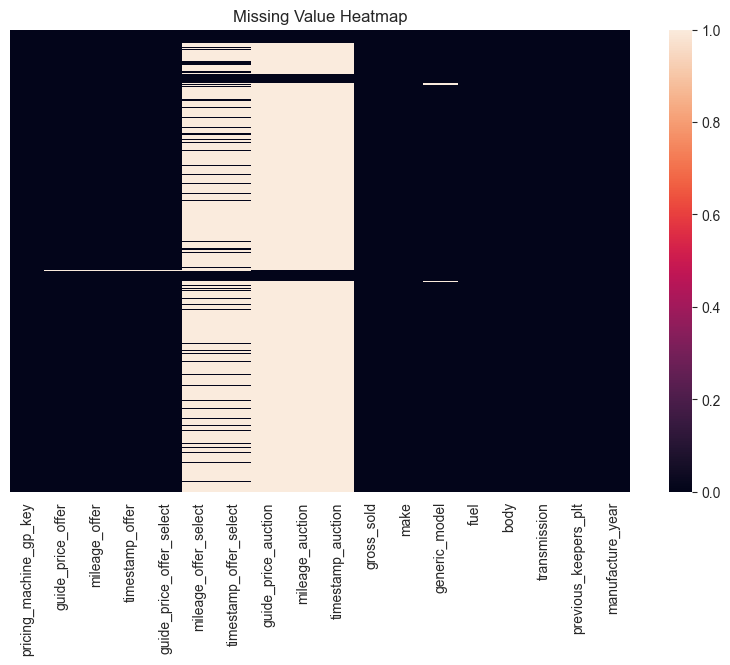

In [6]:
# Check missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True)
plt.title('Missing Value Heatmap')
plt.show()

## The time distribution for each stage in the car bidding
- Offer
- Offer Select
- Auction

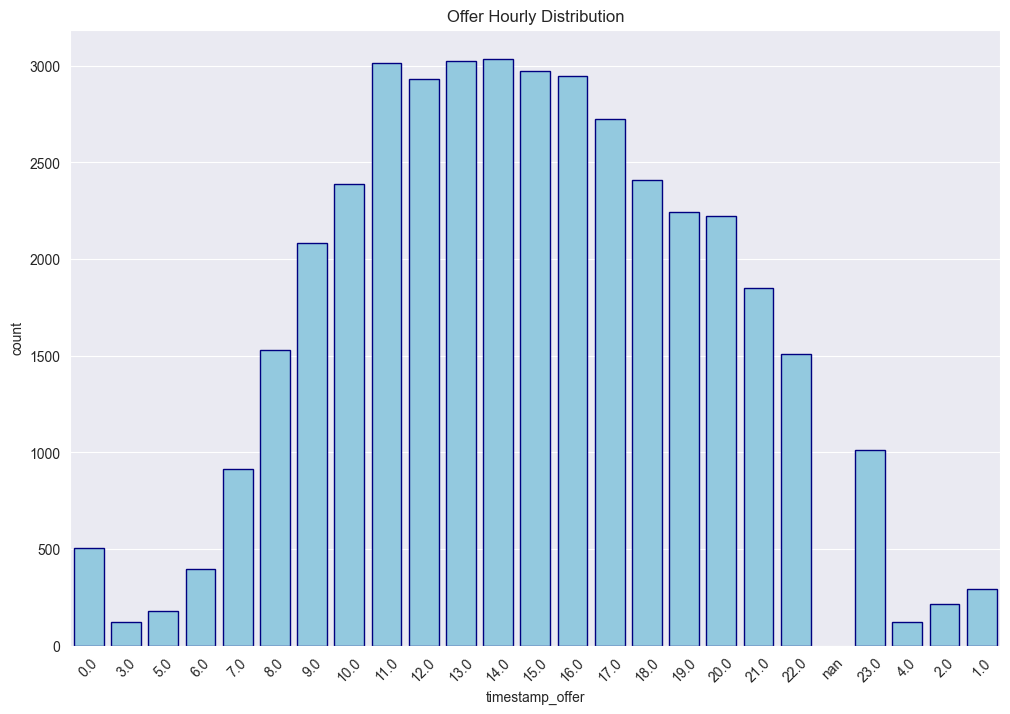

In [7]:
# show date distribution
df['timestamp_offer'] = pd.to_datetime(df['timestamp_offer'])
df['timestamp_offer_select'] = pd.to_datetime(df['timestamp_offer_select'])
df['timestamp_auction'] = pd.to_datetime(df['timestamp_auction'])

# Visualisation, subplot
plt.figure(figsize=(12, 8))
sns.countplot(x=df['timestamp_offer'].dt.hour,
              order=sorted(df['timestamp_offer'].dt.hour),
              color='skyblue',
              edgecolor='navy')
plt.title('Offer Hourly Distribution')
plt.xticks(rotation=45)
plt.show()

# plt.subplot(3, 1, 2)
# sns.histplot(df['timestamp_offer_select'].dt.date, kde=True)
# plt.title('Offer Select Date Distribution')
# plt.xticks(rotation=45)
#
# plt.subplot(3, 1, 3)
# sns.histplot(df['timestamp_auction'].dt.date, kde=True)
# plt.title('Auction Date Distribution')
# plt.xticks(rotation=45)
# plt.show()

## The distribution of the gross_sold
- 0: Not sold
- 1: Sold

## The distribution of the gross_sold by each stage
- Offer
- Offer Select
- Auction

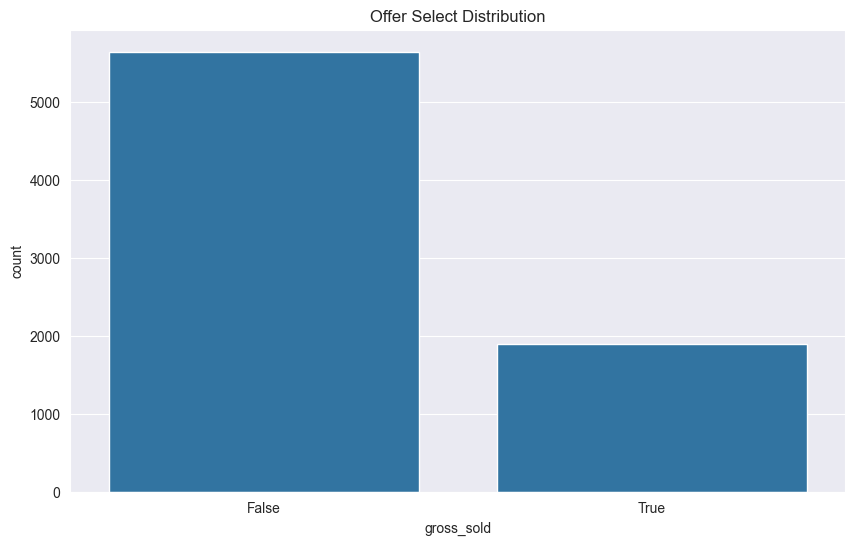

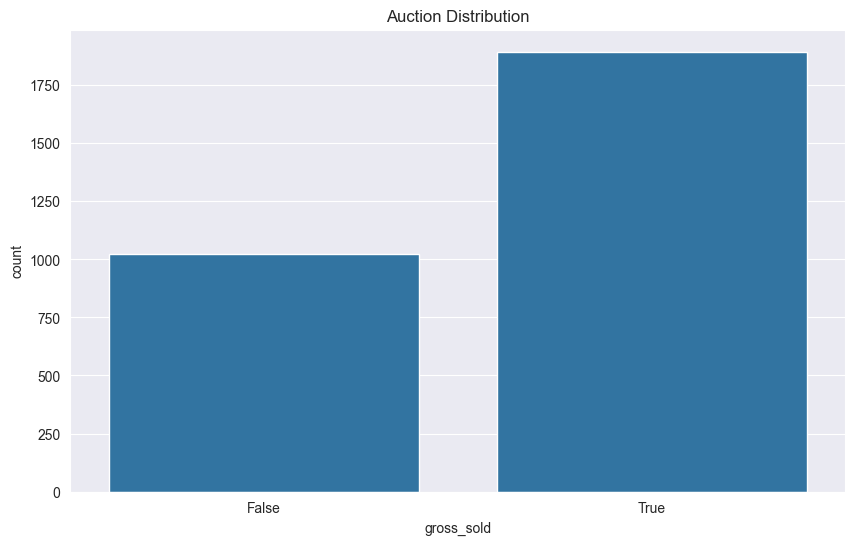

In [8]:
# check na value for offer select and auction
m_1 = df['timestamp_offer_select'].notna()
m_2 = df['timestamp_auction'].notna()

df[m_1 & m_2]['gross_sold'].value_counts(), df[m_1 & ~m_2]['gross_sold'].value_counts(), df[m_1]['gross_sold'].value_counts()
# visualisation
plt.figure(figsize=(10, 6))
sns.countplot(x='gross_sold', data=df[m_1])
plt.title('Offer Select Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='gross_sold', data=df[m_1 & m_2])
plt.title('Auction Distribution')
plt.show()

## The distribution of guide price for each brand by average

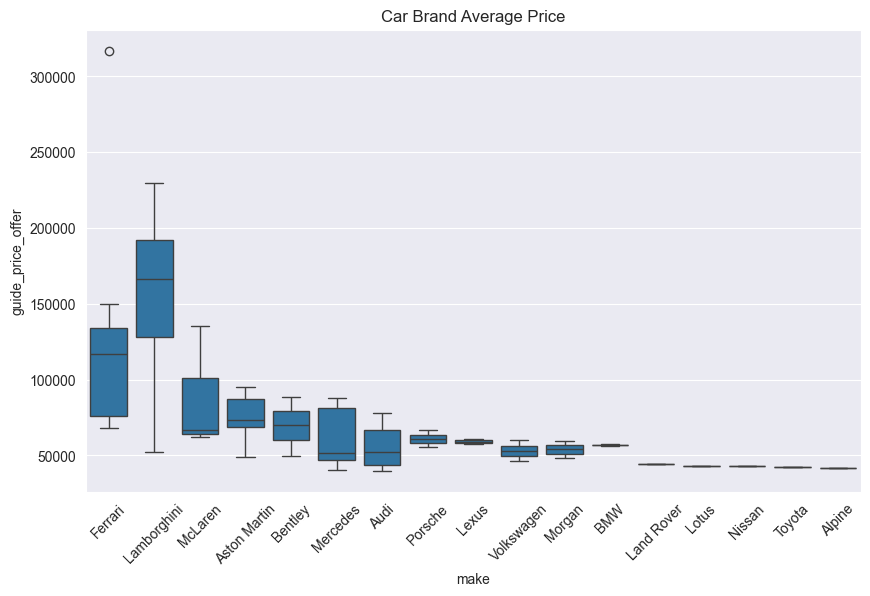

In [9]:
brand_model_price = df.groupby(['make', 'generic_model'])['guide_price_offer'].mean().sort_values(ascending=False).reset_index()

# Visualisation (no barplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='make', y='guide_price_offer', data=brand_model_price.head(50))
plt.title('Car Brand Average Price')
plt.xticks(rotation=45)
plt.show()

## The data count for each brand

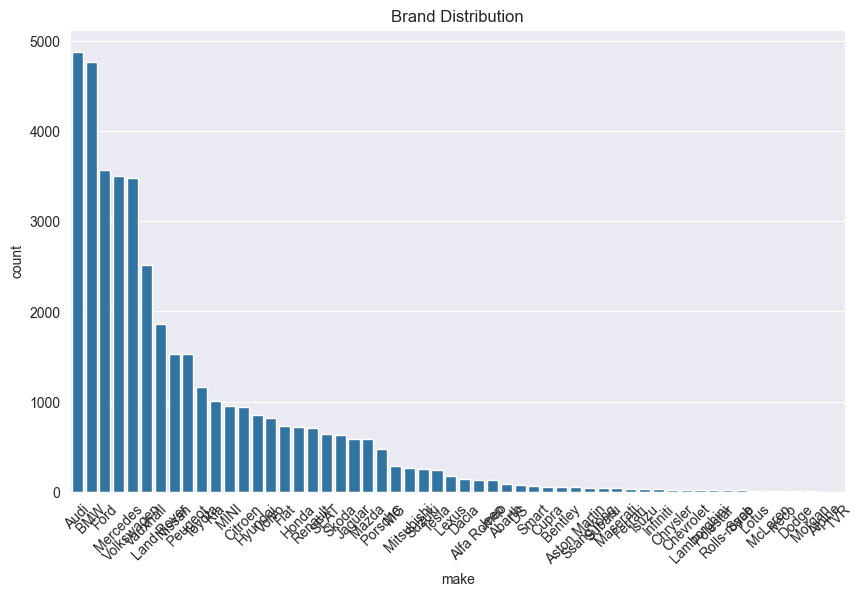

In [10]:
# Visualisation
plt.figure(figsize=(10, 6))
sns.countplot(x='make', data=df, order=df['make'].value_counts().index)
plt.title('Brand Distribution')
plt.xticks(rotation=45)
plt.show()

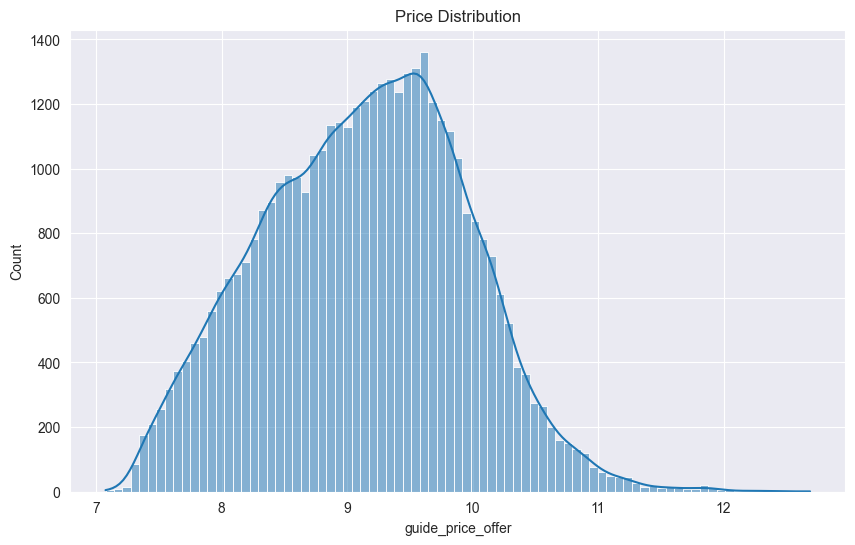

In [11]:
# Check the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df['guide_price_offer']).dropna(), kde=True)
plt.title('Price Distribution')
plt.show()

In [12]:
high_end_brands = ['Porsche', 'Aston Martin', 'Bentley', 'Ferrari', 'Lamborghini', 'McLaren', 'Rolls-Royce']

df[df['make'].isin(high_end_brands)]['make'].value_counts()

make
Porsche         473
Bentley          51
Aston Martin     49
Ferrari          33
Lamborghini      16
McLaren           5
Name: count, dtype: int64

## The distribution of the top-10 most popular model

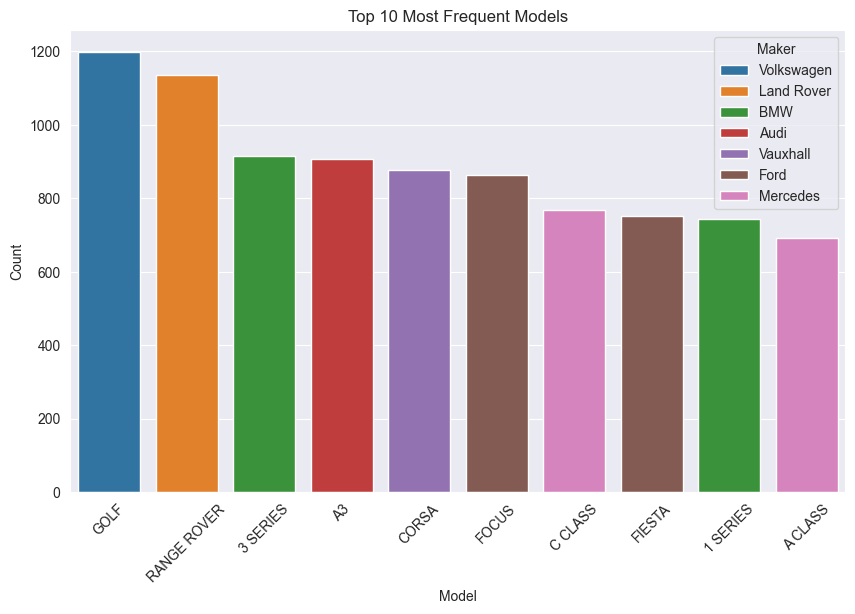

In [13]:
# Most frequent model
most_frequent_model = df[['make', 'generic_model']].value_counts().reset_index()
most_frequent_model.columns = ['Maker','Model', 'Count']

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Count', data=most_frequent_model.head(10), hue='Maker')
plt.title('Top 10 Most Frequent Models')
plt.xticks(rotation=45)
plt.show()

## Feature Engineering

The feature engineering process includes several transformations and calculations to create meaningful features from the raw data:

  - `year_used`: (Current year - manufacture year)
  - `hour_of_day_*`: Hour of day for offer, offer_select, and auction timestamps
  - `day_of_year_*`: Day of year for offer, offer_select, and auction timestamps
  - `time_diff_offer_select_minutes_log`: Log-transformed time difference between offer and offer_select
  - `time_diff_auction_minutes_log`: Log-transformed time difference between offer_select and auction
  - `mileage_per_year`: Mileage / year_used
  - `high_end`: True if the brand is in ['Porsche', 'Aston Martin', 'Bentley', 'Ferrari', 'Lamborghini', 'McLaren', 'Rolls-Royce']
  - `previous_keepers_plt`: Number of previous vehicle owners
  - `price_diff_auction`: Percentage price difference between offer_select and auction

  - `hour_of_day_offer_sin`: Sine transformation of hour_of_day_offer
  - `hour_of_day_offer_cos`: Cosine transformation of hour_of_day_offer
  - `hour_of_day_offer_select_sin`: Sine transformation of hour_of_day_offer_select
  - `hour_of_day_offer_select_cos`: Cosine transformation of hour_of_day_offer_select

  - `offer_accept`: Boolean, whether offer was accepted
  - `auction_accept`: Boolean, whether auction was completed

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import  OneHotEncoder


def create_features(df):
    df['hour_of_day_offer_sin'] = np.sin(2 * np.pi * df['hour_of_day_offer']/24)
    df['hour_of_day_offer_cos'] = np.cos(2 * np.pi * df['hour_of_day_offer']/24)
    df['hour_of_day_offer_select_sin'] = np.sin(2 * np.pi * df['hour_of_day_offer_select']/24)
    df['hour_of_day_offer_select_cos'] = np.cos(2 * np.pi * df['hour_of_day_offer_select']/24)
    df['hour_of_day_auction_sin'] = np.sin(2 * np.pi * df['hour_of_day_auction']/24)
    df['hour_of_day_auction_cos'] = np.cos(2 * np.pi * df['hour_of_day_auction']/24)

    df['model_avg_price'] = df.groupby(['make','generic_model'])['guide_price_auction'].transform('mean')
    df['model_std_price'] = df.groupby(['make','generic_model'])['guide_price_auction'].transform('std')
    df['make_avg_price'] = df.groupby('make')['guide_price_auction'].transform('mean')
    df['make_std_price'] = df.groupby('make')['guide_price_auction'].transform('std')

    df['price_to_make_avg_ratio'] = df['guide_price_auction'] / df['make_avg_price']

    return df

def calculate_year_used(df, timestamp_col='timestamp_offer', year_col='manufacture_year'):
    if df[timestamp_col].dtype == 'object':
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])

    df['year_used'] = (df[timestamp_col].dt.year - df[year_col]).astype(float)
    return df

def calculate_mileage_per_year(df, mileage_col='mileage_offer', year_col='year_used'):
    df['mileage_per_year'] = df[mileage_col] / df[year_col]
    return df

def mark_high_end(df):
    high_end_brands = ['Porsche', 'Aston Martin', 'Bentley', 'Ferrari', 'Lamborghini', 'McLaren', 'Rolls-Royce', 'Mercedes']
    df['high_end'] = df['make'].isin(high_end_brands).astype(float)

    return df

def calculate_day_hour(df):
    df['timestamp_offer'] = pd.to_datetime(df['timestamp_offer'])
    df['timestamp_offer_select'] = pd.to_datetime(df['timestamp_offer_select'])
    df['timestamp_auction'] = pd.to_datetime(df['timestamp_auction'])

    # day of year
    df['hour_of_day_offer'] = df['timestamp_offer'].dt.hour
    df['day_of_year_offer'] = df['timestamp_offer'].dt.dayofyear

    # offer_select
    df['hour_of_day_offer_select'] = df['timestamp_offer_select'].dt.hour
    df['day_of_year_offer_select'] = df['timestamp_offer_select'].dt.dayofyear

    # auction
    df['hour_of_day_auction'] = df['timestamp_auction'].dt.hour
    df['day_of_year_auction'] = df['timestamp_auction'].dt.dayofyear

    return df

def calculate_time_diff(df):
    df['time_diff_offer_select_minutes_log'] = ((df['timestamp_offer_select'] - df['timestamp_offer']).dt.total_seconds()/60).apply(np.log1p)
    df['time_diff_auction_minutes_log'] = ((df['timestamp_auction'] - df['timestamp_offer_select']).dt.total_seconds()/60).apply(np.log1p)
    return df

# fillna with previous stage
def fillna_previous_stage(df):
    df['guide_price_offer_select'] = df['guide_price_offer_select'].fillna(df['guide_price_offer'])
    df['mileage_offer_select'] = df['mileage_offer_select'].fillna(df['mileage_offer'])
    df['timestamp_offer_select'] = df['timestamp_offer_select'].fillna(df['timestamp_offer'])
    df['guide_price_auction'] = df['guide_price_auction'].fillna(df['guide_price_offer_select'])
    df['mileage_auction'] = df['mileage_auction'].fillna(df['mileage_offer_select'])
    df['timestamp_auction'] = df['timestamp_auction'].fillna(df['timestamp_offer_select'])
    return df


# calculate price difference by percentage 100%
def calculate_price_diff(df):
    df['price_diff_auction'] = ((df['guide_price_auction'] - df['guide_price_offer_select']) / df['guide_price_offer_select']) * 100
    return df

# if guide_price_offer_select not na -> offer_accept = True
# if guide_price_auction not na -> auction_accept = True
def calculate_acceptance(df):
    df['offer_accept'] = df['timestamp_offer_select'].notna()
    print(f"Offer Acceptance Rate: {df['offer_accept'].mean():.1%}")
    df['auction_accept'] = df['timestamp_auction'].notna()
    print(f"Auction Acceptance Rate: {df['auction_accept'].mean():.1%}")
    return df

def handle_missing_values(df):
    df = df.dropna(subset=['generic_model', 'fuel', 'body', 'transmission', 'previous_keepers_plt', 'manufacture_year', 'mileage_offer', 'timestamp_offer', 'guide_price_offer_select'])
    return df

def encode_categorical(df, columns, n_components=10):
    onehot_encoder = OneHotEncoder(sparse=False, drop='first')

    for column in columns:
        encoded = onehot_encoder.fit_transform(df[[column]])
        pca = PCA(n_components=n_components)
        encoded_pca = pca.fit_transform(encoded)
        for i in range(encoded_pca.shape[1]):
            df[f'{column}_pca_{i+1}'] = encoded_pca[:, i]
        df = df.drop(column, axis=1)

    return df

def normalize_numerical(df, columns=None):
    from sklearn.preprocessing import StandardScaler
    df_normalized = df.copy()
    scaler = StandardScaler()
    for col in columns:
        df_normalized[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))
    return df_normalized

def feature_engineering(df):
    df['gross_sold'] = df['gross_sold'].astype(int)

    df = calculate_acceptance(df)
    df = handle_missing_values(df)
    df = fillna_previous_stage(df)

    df = calculate_price_diff(df)
    df = calculate_year_used(df)
    df = calculate_mileage_per_year(df)
    df = mark_high_end(df)
    df = calculate_day_hour(df)
    df = calculate_time_diff(df)

    df = create_features(df)
    return df

new_df = feature_engineering(df)
new_df.to_csv('car_processed.csv', index=False)

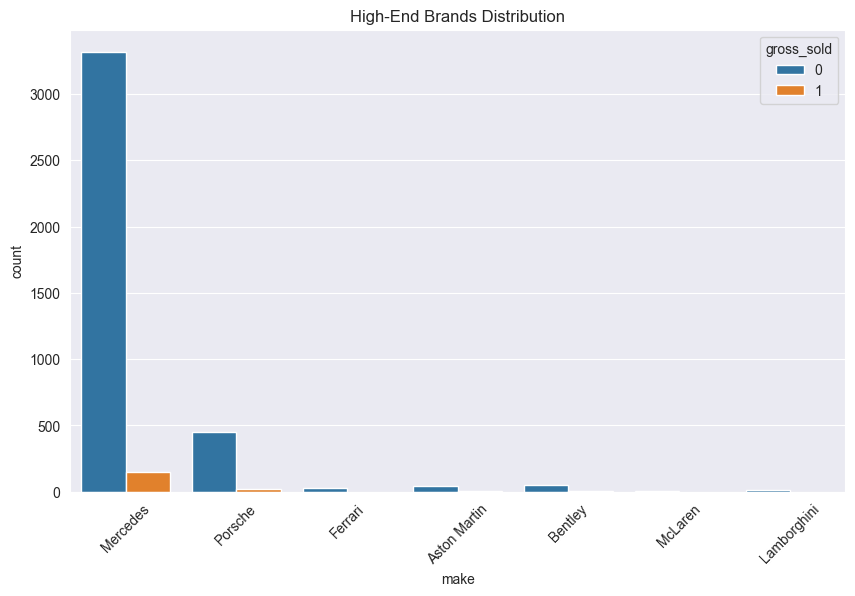

In [15]:
# visualise the high-end brands
plt.figure(figsize=(10, 6))
high_end_brands_df = new_df[new_df['high_end'] == True]
sns.countplot(x='make',data=high_end_brands_df, hue='gross_sold')
plt.title('High-End Brands Distribution')
plt.xticks(rotation=45)
plt.show()

## Price distribution for the GOLF model

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

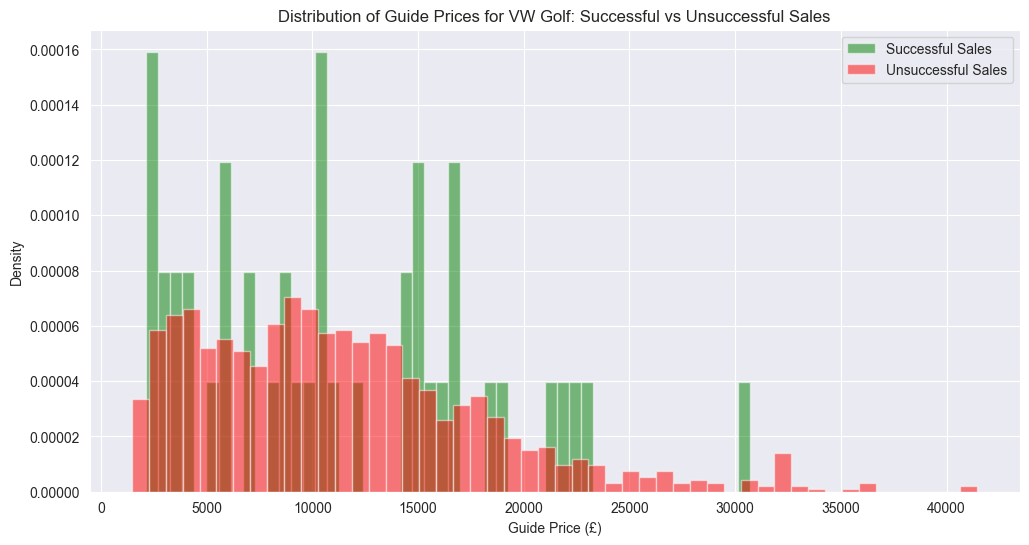

In [16]:
plt.figure(figsize=(12, 6))

golf_df = new_df[new_df['generic_model'] == 'GOLF']

plt.hist(golf_df[golf_df['gross_sold'] == 1]['guide_price_offer'],
         bins=50, alpha=0.5, label='Successful Sales',
         density=True, color='green')
plt.hist(golf_df[golf_df['gross_sold'] == 0]['guide_price_offer'],
         bins=50, alpha=0.5, label='Unsuccessful Sales',
         density=True, color='red')

plt.xlabel('Guide Price (£)')
plt.ylabel('Density')
plt.title('Distribution of Guide Prices for VW Golf: Successful vs Unsuccessful Sales')
plt.legend()
plt.grid(True)

successful_mean = golf_df[golf_df['gross_sold'] == 1]['guide_price_offer']
unsuccessful_mean = golf_df[golf_df['gross_sold'] == 0]['guide_price_offer']

plt.axvline(successful_mean, color='green', linestyle='--', alpha=0.5)
plt.axvline(unsuccessful_mean, color='red', linestyle='--', alpha=0.5)

stats_text = f'Successful Sales Mean: £{successful_mean:,.0f}\n'
stats_text += f'Unsuccessful Sales Mean: £{unsuccessful_mean:,.0f}\n'
stats_text += f'Success Rate: {(golf_df["gross_sold"] == 1).mean():.1%}'

plt.text(0.95, 0.95, stats_text,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.show()

## Feature importance

/var/folders/f6/trfq1fgj0_l733v75wljr70r0000gn/T/ipykernel_86119/3844764523.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])


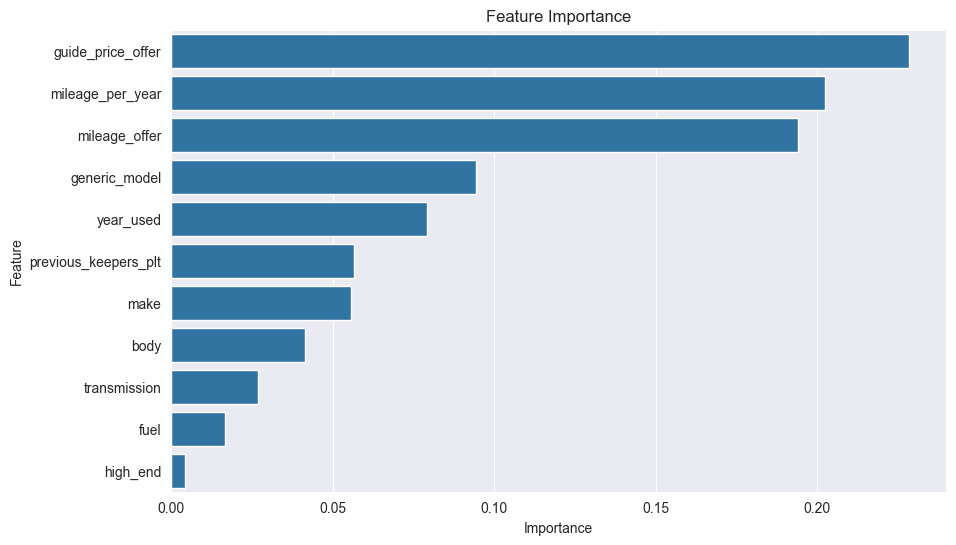

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

numerical_columns = ['guide_price_offer', 'mileage_offer','gross_sold', 'previous_keepers_plt', 'year_used', 'mileage_per_year']
categorical_columns = ['make', 'generic_model', 'fuel', 'body', 'transmission', 'high_end']


label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])
    label_encoders[col] = le

X = new_df[numerical_columns + categorical_columns].drop('gross_sold', axis=1)
y = new_df['gross_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()
